Importing the Dependencies

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.datasets import fetch_openml

Importing the dataset

In [93]:
boston = fetch_openml(name="boston", version=1,as_frame=True)

In [94]:
X=boston.data
Y=boston.target

In [95]:
house_price_dataframe=pd.concat([X,Y], axis=1)

In [96]:
boston.data.shape

(506, 13)

In [97]:
house_price_dataframe=pd.DataFrame(boston.data)

In [98]:
house_price_dataframe['price']=boston.target

In [99]:
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [100]:
house_price_dataframe.shape

(506, 14)

In [101]:
house_price_dataframe.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [102]:
house_price_dataframe.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the correlation between various features in the dataset

In [103]:
correlation=house_price_dataframe.corr()

<Axes: >

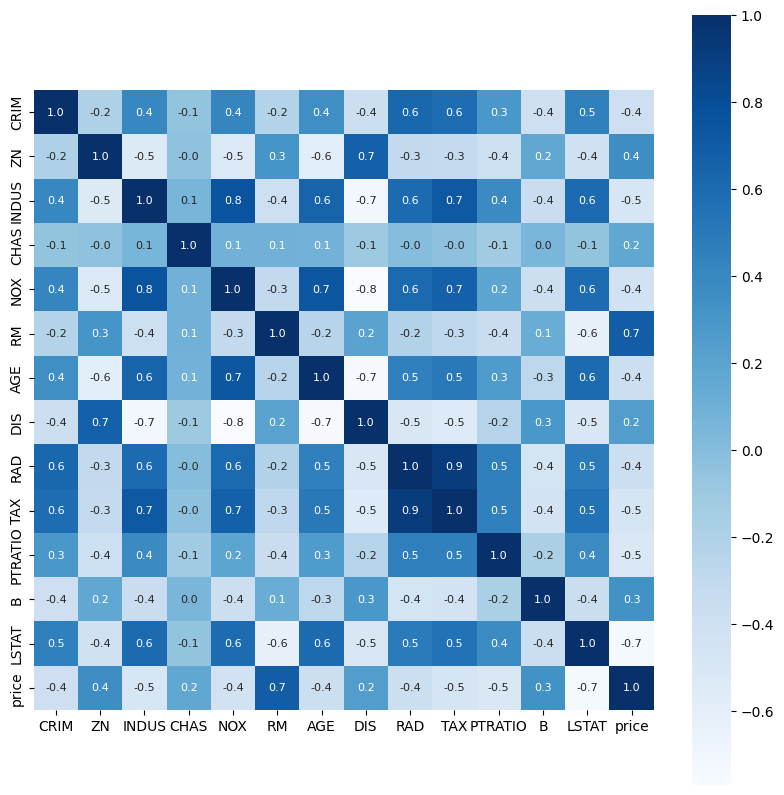

In [104]:
#constructing the heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation ,cbar=True,square =True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

Converting categorical to numerical value

In [105]:
print(X.dtypes)

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD        category
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
dtype: object


In [106]:
X = boston.data.copy()
X['CHAS']=X['CHAS'].astype(int)
X['RAD']=X['RAD'].astype(int)

In [107]:
print(X.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object


In [108]:
print(X)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [109]:
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


Splitting the data into training and testing data

In [110]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=5)

In [111]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((404, 13), (102, 13), (404,), (102,))

Model Training

In [112]:
model=XGBRegressor()

In [113]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Model Evaluation

Prediction on train data

In [114]:
training_data_prediction=model.predict(X_train)

In [115]:
print(training_data_prediction)

[13.114701  49.996326   8.79787   20.58246   12.088707  49.995926
 24.09961   16.115997  23.898369  24.290401  13.083237  30.298653
 15.185922  13.801624  26.395115  16.609577  18.899702  17.59578
 18.72247   33.396564  20.69708   17.106596  23.40158   26.50107
 21.401827  21.498734  19.201668  50.00748   49.99411   23.008085
 10.501741  17.775818  10.886859  21.013084  13.802078  10.495472
 22.213753  30.517263  19.385174  15.614071  20.197042  19.299438
 34.58055   50.00119   24.003407  18.695778  19.810612  22.495632
 13.301719  49.997295  11.7890835 10.992363  23.718288  35.405285
 15.180075  24.401577  33.40338   31.593742  13.406015  34.896294
 14.402854  35.386456  25.295538  18.327286  16.594278  13.4043045
 23.61434   27.504257  22.181475  17.716856  14.346889  21.721224
  8.401657  15.304691  20.305433  32.00454   20.003786  19.095224
 28.683947  45.99075   22.59062   23.885317  21.886457  15.6009865
 49.998394  24.998165  37.900196  21.572517  19.300945  17.503662
 22.862402

In [116]:
# R sqaured error
score_1=metrics.r2_score(Y_train,training_data_prediction)
# Mean absolute error
score_2=metrics.mean_absolute_error(Y_train,training_data_prediction)

In [118]:
print('R sqaure error :',score_1)
print('Mean absolute error:',score_2)

R sqaure error: 0.9999975984095375
Mean absolute error: 0.009723323406559419


Prediction on test data

In [119]:
testing_data_prediction=model.predict(X_test)

In [120]:
# R sqaured error
score_1 = metrics.r2_score(Y_test,testing_data_prediction)
# Mean absolute error
score_2 = metrics.mean_absolute_error(Y_test,testing_data_prediction)

In [121]:
print('R sqaure error:',score_1)
print('Mean absolute error:',score_2)

R sqaure error: 0.8746904274642477
Mean absolute error: 2.143903751934276


Visualizing data on actual prices and predicting prices

For training data

Text(0.5, 1.0, ' Actual prices Vs Predicted prices ')

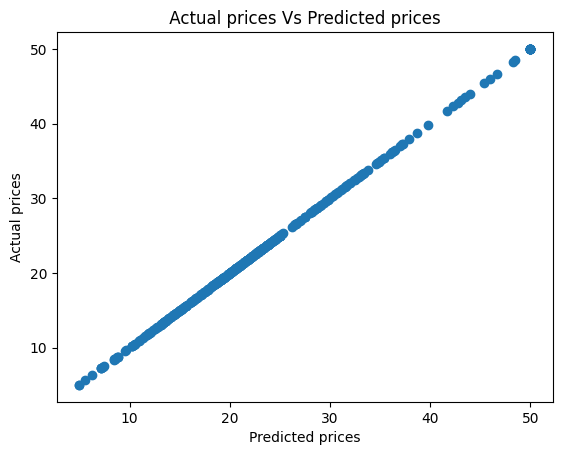

In [123]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Predicted prices')
plt.ylabel('Actual prices')
plt.title(' Actual prices Vs Predicted prices ')

Visualizing data on actual prices and predicting prices

For testing data

Text(0.5, 1.0, 'Actual prices Vs Predicted prices')

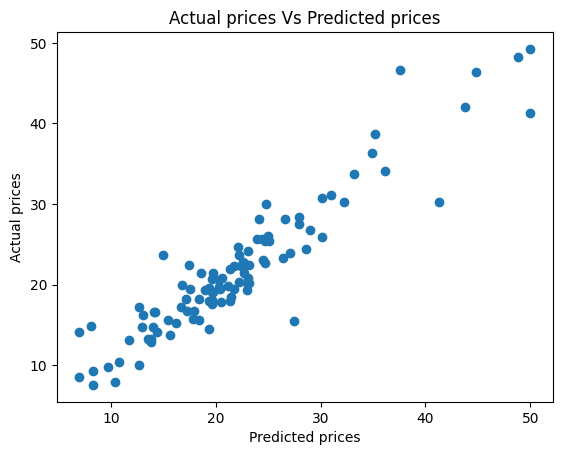

In [125]:
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel('Predicted prices')
plt.ylabel('Actual prices')
plt.title('Actual prices Vs Predicted prices')

Making predictive model

In [129]:
input_data=[	0.00632,	18.0	,2.31,	0	,0.538	,6.575,	65.2,	4.0900,	1	,296.0,	15.3,	396.90	,4.98]
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [130]:
prediction=model.predict(input_data_reshaped)

In [132]:
print('The predicted price of house is:',prediction)

The predicted price of house is: [24.003407]
